In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_22 = pd.read_csv('Nutrient analysis data 2022.csv', encoding='unicode_escape')
df_22.head()

,PO4- (µg/L),NH4- (µg/L),NO3- (µg/L),Chl-a (µg/L),Salinity (PSU),Temperature (°C),pH,Year
0,98.77,139.26,90.90,3.7408,20,28.798,8.0,2022
1,113.02,5.05,83.21,6.3840,24,30.044,8.3,2022
2,112.07,4.69,90.47,4.4352,23,30.040,8.3,2022
3,103.52,84.60,74.10,3.6064,22,30.028,8.3,2022
4,92.12,8.84,93.38,3.5168,21,30.854,8.2,2022


In [8]:
df_21 = pd.read_csv('Nutrient analysis data 2021.csv', encoding='unicode_escape')
df_21.head()

,PO4 µg/L,NH4 µg/L,NO3 µg/L,Chl-a (µg/L),Salinity (PSU),Temperature (°C),pH,Year
0,82.63,45.26,45.264,7.88,2.41,26.444,8.1,2021
1,73.13,31.00,31.002,7.87,3.07,26.530,8.1,2021
2,68.38,166.73,166.731,5.30,4.64,26.298,8.3,2021
3,65.53,208.09,208.088,5.47,4.63,26.306,8.3,2021
4,66.48,660.35,660.352,4.70,5.00,26.476,8.2,2021


In [27]:
df_21.columns=[col.replace('µg/L', '').replace('°C', '').replace('(', '').replace(')', '').replace('-', '').strip().replace(' ', '_') for col in df_21.columns]

In [23]:
df_22.columns=[col.replace('µg/L', '').replace('°C', '').replace('(', '').replace(')', '').replace('-', '').strip().replace(' ', '_') for col in df_22.columns]

In [28]:
df_21.columns == df_22.columns

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [29]:
df_21.columns

Index(['PO4', 'NH4', 'NO3', 'Chla', 'Salinity_PSU', 'Temperature', 'pH',
       'Year'],
      dtype='object')

In [26]:
df_22.columns

Index(['PO4', 'NH4', 'NO3', 'Chla', 'Salinity_PSU', 'Temperature', 'pH',
       'Year'],
      dtype='object')

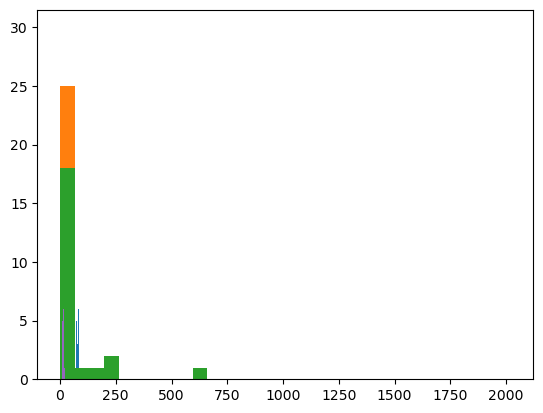

In [33]:
for col in df_21.columns:
    plt.hist(df_21[col])

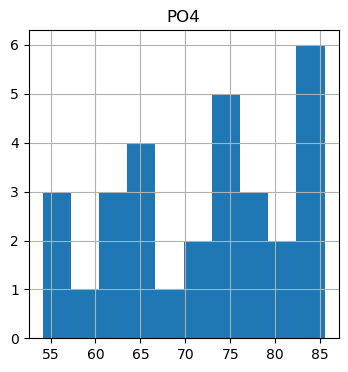

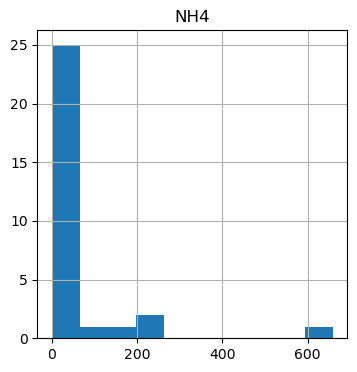

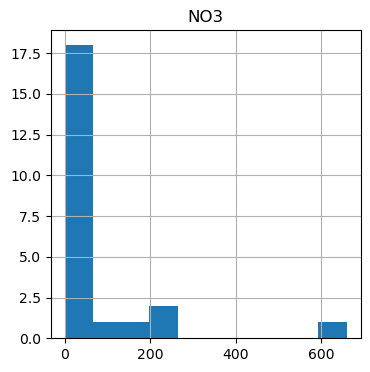

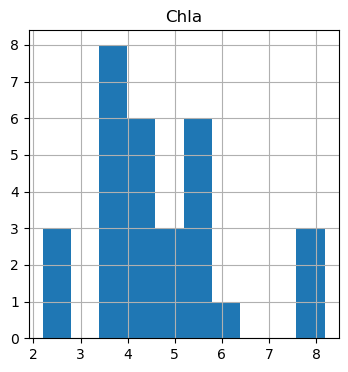

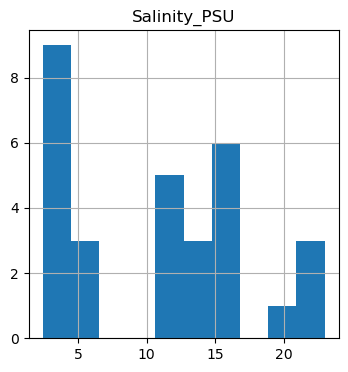

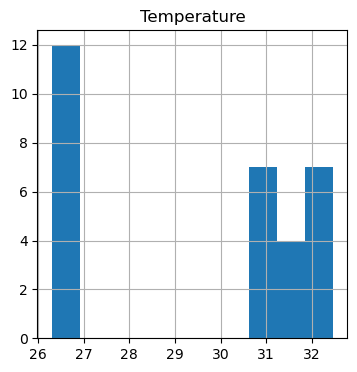

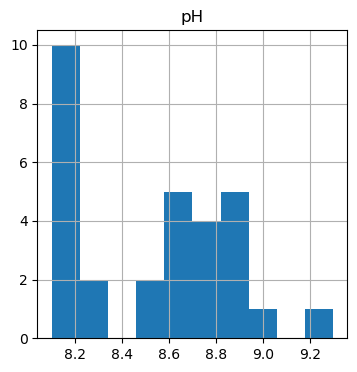

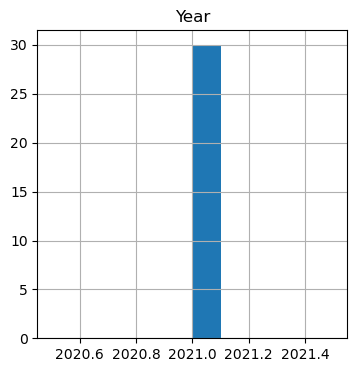

In [36]:
for col in df_21.columns:
    plt.figure(figsize=(4,4))
    df_21[col].hist()
    plt.title(col)

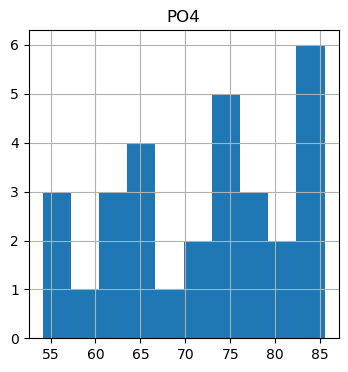

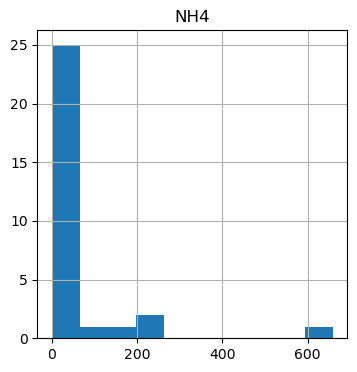

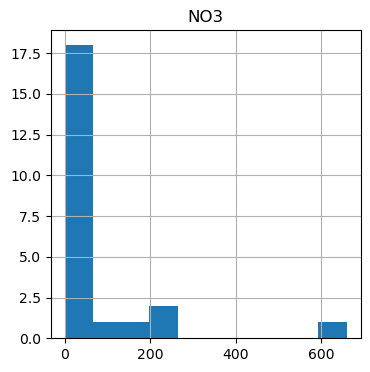

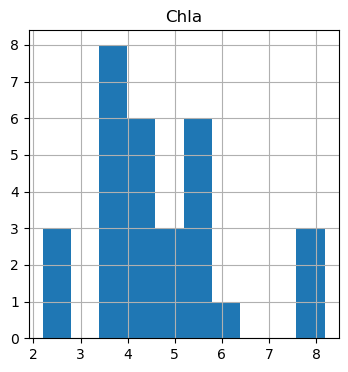

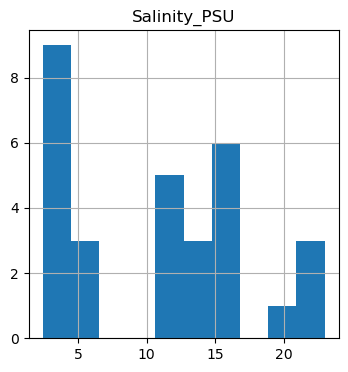

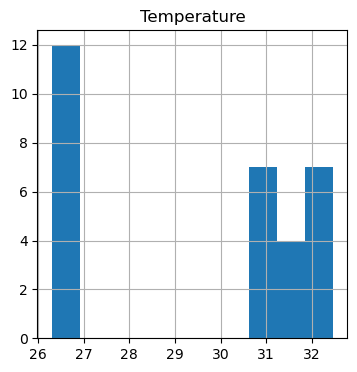

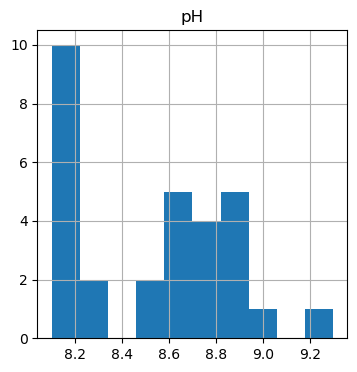

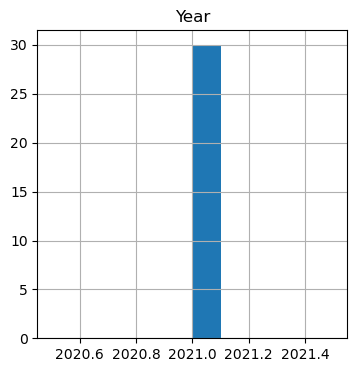

In [37]:
for col in df_22.columns:
    plt.figure(figsize=(4,4))
    df_21[col].hist()
    plt.title(col)

In [48]:
df_21.columns

Index(['PO4', 'NH4', 'NO3', 'Chla', 'Salinity_PSU', 'Temperature', 'pH',
       'Year'],
      dtype='object')

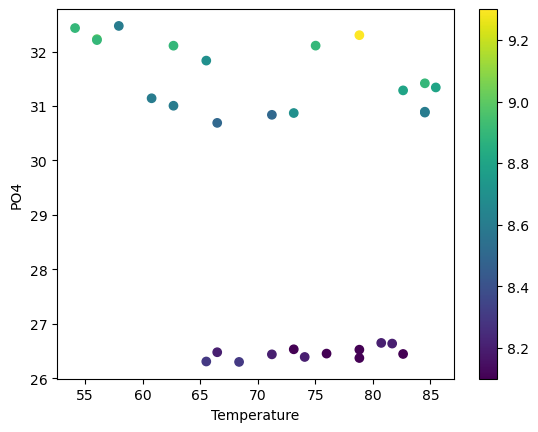

In [45]:
plt.scatter(df_21['PO4'], df_21['Temperature'], c=df_21['pH'])
plt.ylabel('PO4')
plt.xlabel('Temperature')
plt.colorbar()
plt.show()

In [ ]:
[]

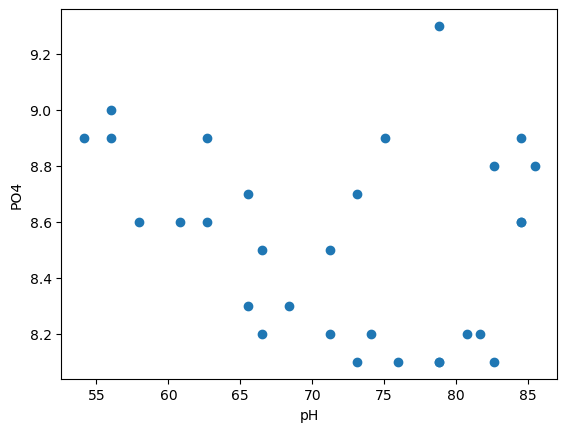

In [47]:
plt.scatter(df_21['PO4'], df_21['pH'])#, c=df_21['pH'])
plt.ylabel('PO4')
plt.xlabel('pH')
# plt.colorbar()
plt.show()

In [49]:
df = pd.concat([df_21, df_22], ignore_index=True)
print(df.shape)

(49, 8)


In [50]:
df_21.shape

(30, 8)

In [58]:
df['PO4'].max()

113.02

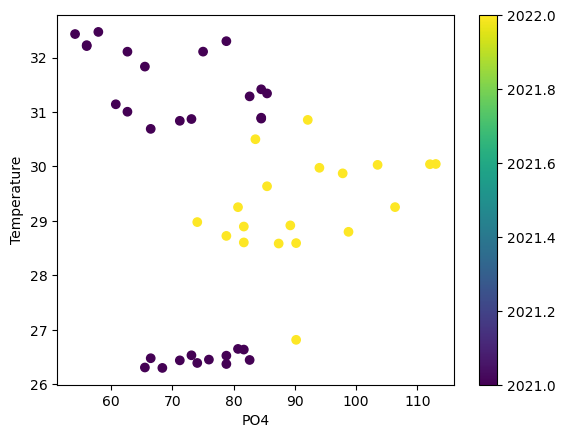

In [59]:
plt.scatter(df['PO4'], df['Temperature'], c=df['Year'])
plt.xlabel('PO4')
plt.ylabel('Temperature')
plt.colorbar()
plt.show()

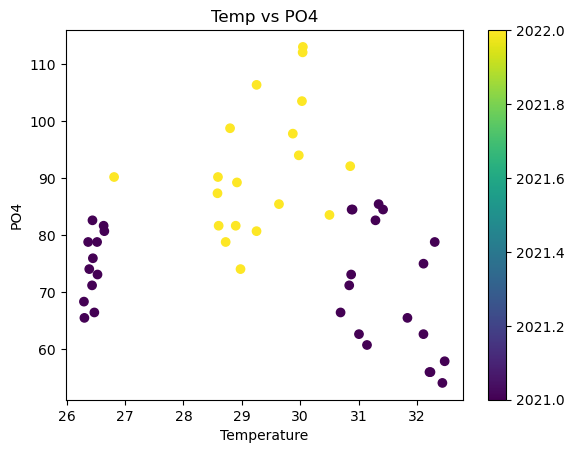

In [61]:
plt.scatter(df['Temperature'], df['PO4'], c=df['Year'])
plt.xlabel('Temperature')
plt.ylabel('PO4')
plt.colorbar()
plt.title('Temp vs PO4')
plt.show()

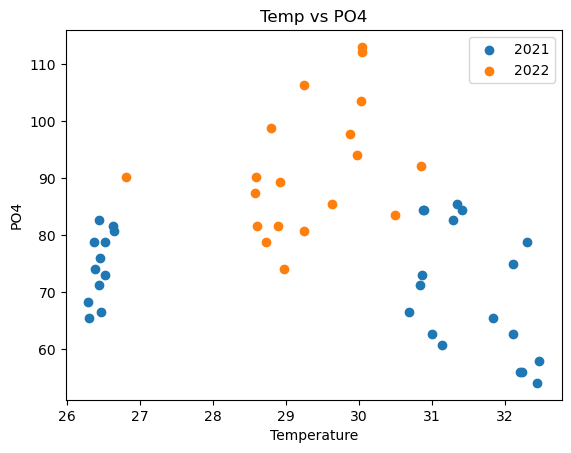

In [63]:

plt.scatter(df_21['Temperature'], df_21['PO4'], label='2021')
plt.scatter(df_22['Temperature'], df_22['PO4'], label='2022')
plt.xlabel('Temperature')
plt.ylabel('PO4')
plt.legend()
plt.title('Temp vs PO4')
plt.show()

In [68]:

def plot_scatter (col1, col2):
    plt.scatter(df_21[col1], df_21[col2], label='2021', color='blue')
    plt.scatter(df_22[col1], df_22[col2], label='2022', color='red')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    plt.title(f'{col1} vs {col2}')
    plt.show()

In [69]:
df.columns

Index(['PO4', 'NH4', 'NO3', 'Chla', 'Salinity_PSU', 'Temperature', 'pH',
       'Year'],
      dtype='object')

In [70]:
x_cols =['Chla', 'Salinity_PSU', 'Temperature', 'pH'] 
y_cols =['PO4', 'NH4', 'NO3']

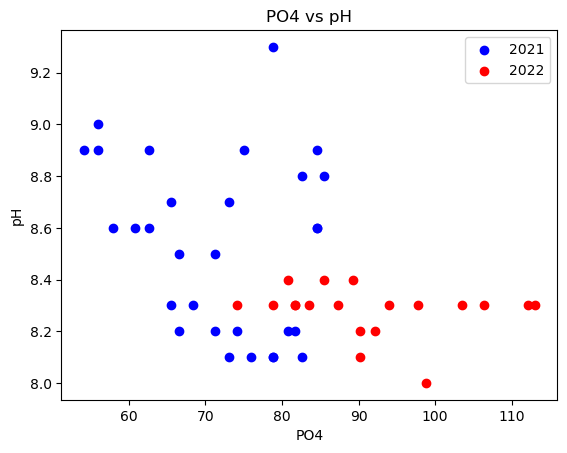

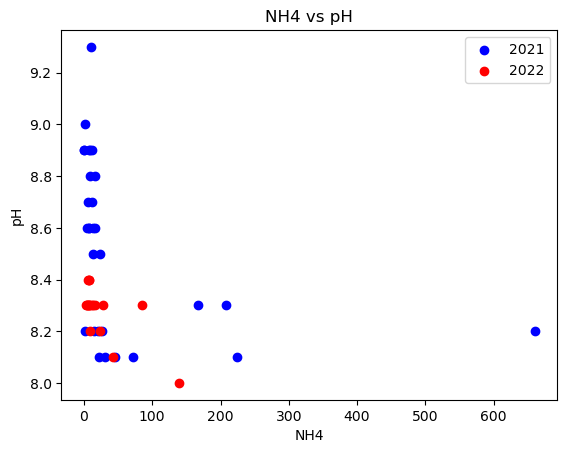

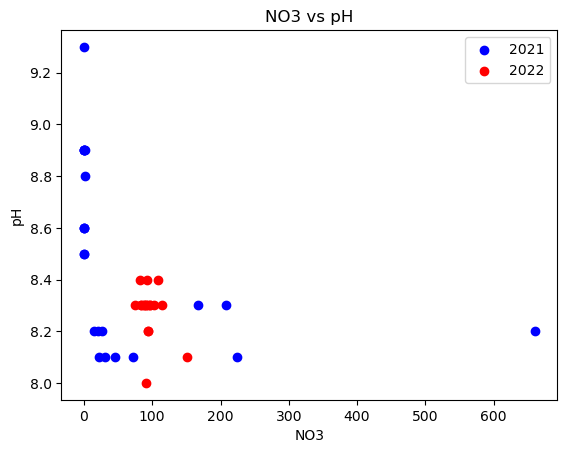

In [75]:
for y in y_cols:
    plot_scatter(y, 'pH')

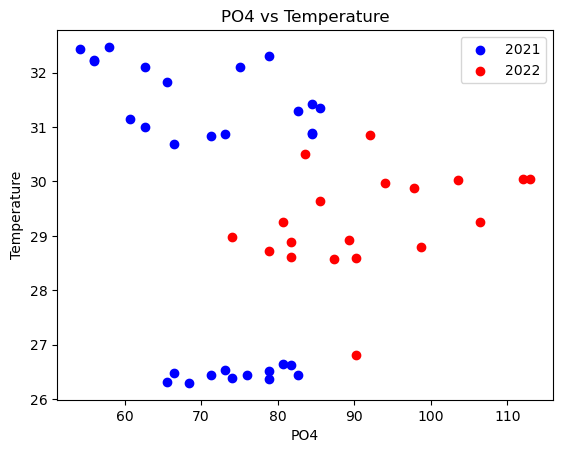

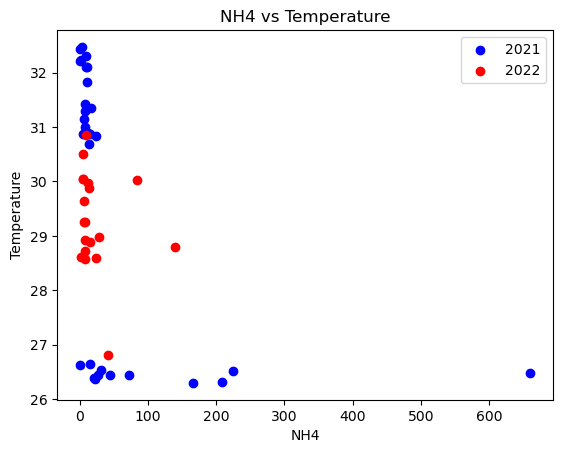

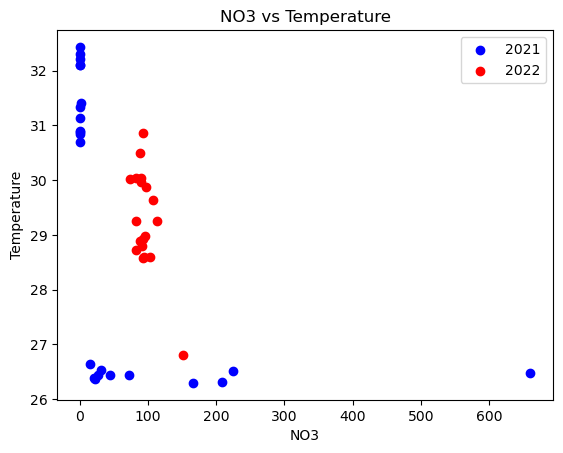

In [74]:
for y in y_cols:
    plot_scatter(y, 'Temperature')

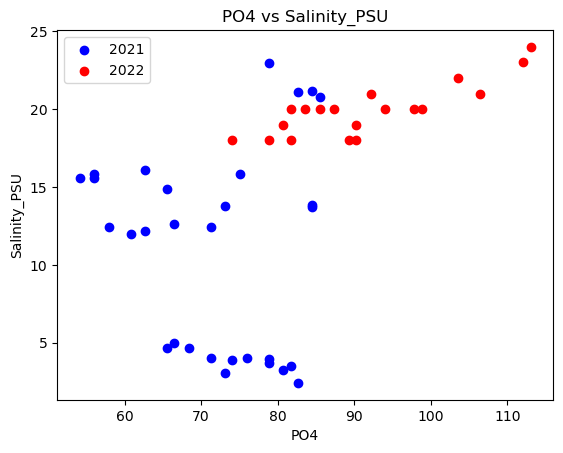

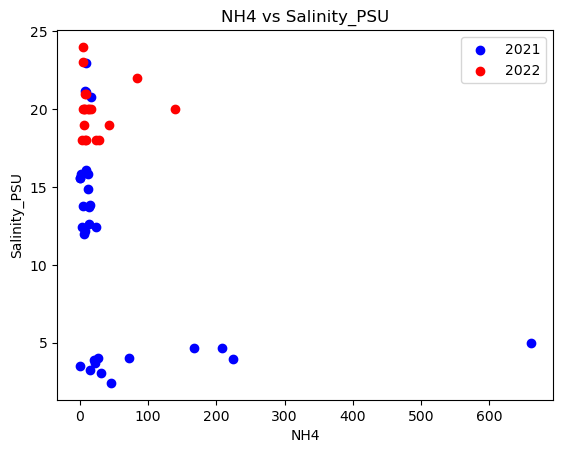

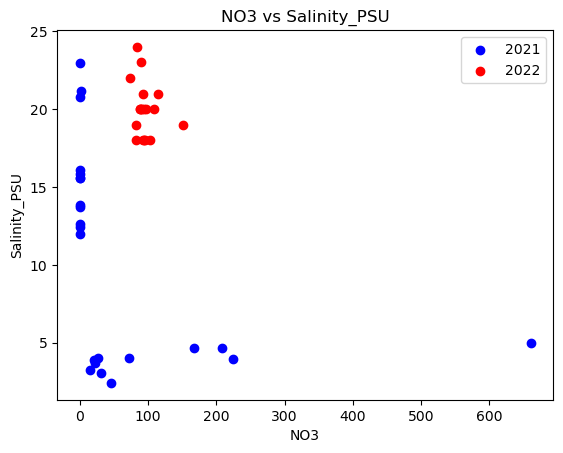

In [73]:
for y in y_cols:
    plot_scatter(y, 'Salinity_PSU')

## Chlorophyl a

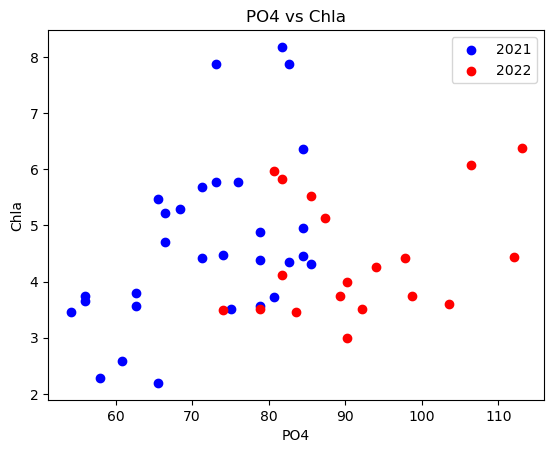

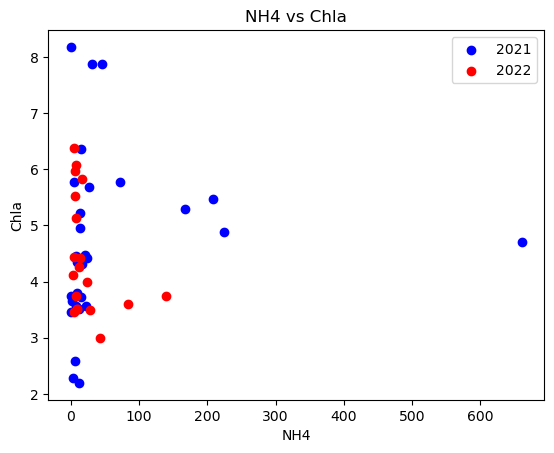

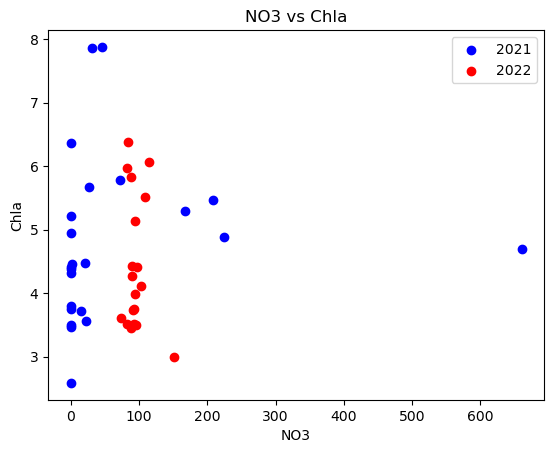

In [72]:
for y in y_cols:
    plot_scatter(y, 'Chla')

# regplot

<AxesSubplot:xlabel='PO4', ylabel='Salinity_PSU'>

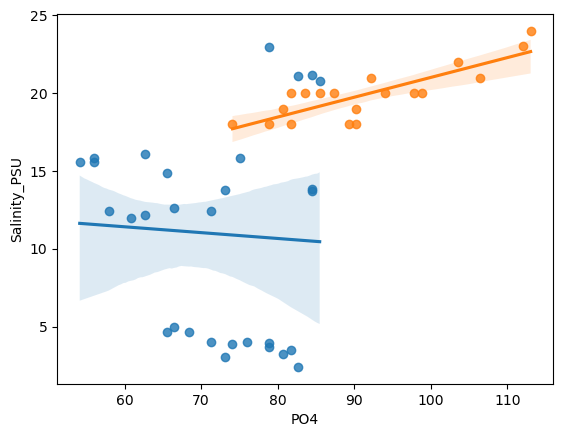

In [81]:
sns.regplot(data=df_21, x="PO4", y="Salinity_PSU")
sns.regplot(data=df_22, x="PO4", y="Salinity_PSU")

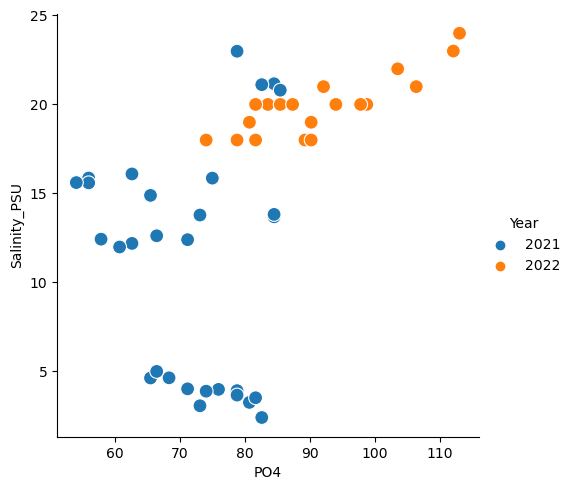

In [88]:
sns.color_palette("tab10")
sns.relplot(data=df, x="PO4", y="Salinity_PSU", hue='Year', height = 5, s = 100, palette='tab10')

<AxesSubplot:xlabel='PO4', ylabel='Salinity_PSU'>

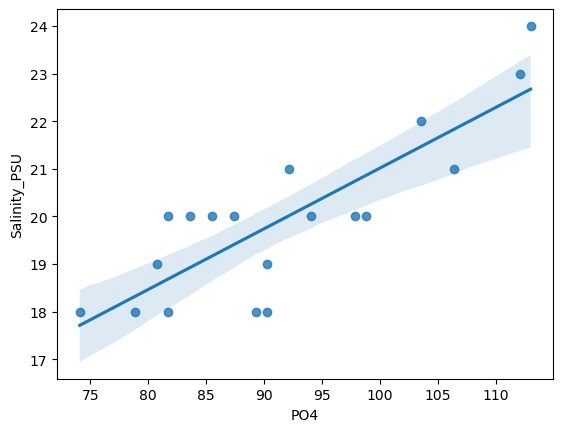

In [79]:
sns.regplot(data=df_22, x="PO4", y="Salinity_PSU")